<a href="https://colab.research.google.com/github/mmilannaik/Campus-DL/blob/main/100DL_S30_Weight%20Initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('100DL_S29_ushape.csv')
# rename the columns
df.rename(columns = {"3.159499363321345566e-02":"X","9.869877579082642072e-01":"Y","0.000000000000000000e+00":"class"},inplace = True)

In [5]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


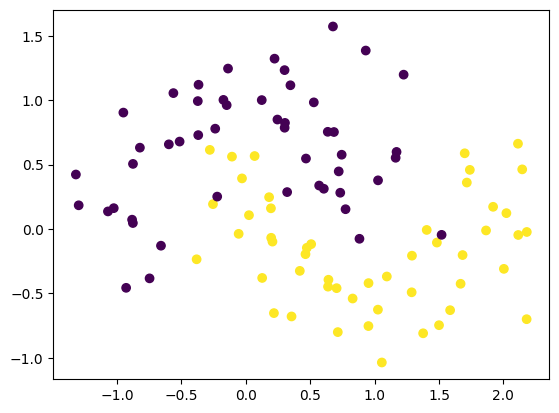

In [6]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.get_weights()

[array([[-0.81252795, -0.44276586, -0.351429  ,  0.21134192,  0.32206172,
          0.79158616,  0.42380196, -0.9728969 , -0.68234485, -0.00786284],
        [ 1.2375227 , -0.90331745, -0.9788036 , -1.9281094 ,  0.6276522 ,
         -0.79800427, -0.04654148,  1.4068533 , -0.02668336, -0.37937522]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.34241992, -0.10227531, -0.6248251 , -0.17134443,  0.30794072,
          0.078371  , -0.22202143, -0.9308181 ,  0.10321935, -0.6521956 ],
        [ 0.57749635,  0.5500037 ,  0.30094764, -0.3859302 , -0.91199607,
         -0.84311235,  0.06543983,  0.05424759,  0.33055487,  0.3755988 ],
        [-0.5435405 , -0.53982645,  0.0954909 ,  0.04160044, -1.0120512 ,
         -0.34862432,  0.23412102,  0.7676849 , -0.28360453,  0.55231696],
        [-0.11020461,  0.10938852,  0.22951849,  0.6401277 , -0.06065523,
         -0.36258647, -0.30145723,  0.86265147,  0.71894515,  0.49843827],
        [ 0.58290

In [11]:
initial_weights = model.get_weights()

In [12]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[-1.4230069e+00,  3.2249162e-01,  5.4651845e-01, -7.0737171e-01,
          5.6896675e-01,  1.7880564e+00,  8.4492850e-01, -2.8407261e-01,
         -1.1060424e+00,  6.3406193e-01],
        [ 1.3500969e-01,  1.0123041e+00, -8.2170837e-02,  6.7202741e-01,
          1.2351936e+00,  1.0322411e-01, -4.8777941e-04,  1.6674302e+00,
          1.9540983e-01,  5.9293056e-01]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.02190976, -0.06635886,  0.09154235,  0.17633992, -0.5668058 ,
          0.18608838, -0.27964944,  0.3067839 , -0.15088405, -0.13214836],
        [ 0.22040309,  0.5369577 , -0.02010773,  0.32727686,  0.13434531,
         -0.09727331, -0.00704152, -0.44937894,  0.19906458,  0.20002824],
        [-0.5650585 ,  0.38019687,  0.44965246,  0.12489579,  0.32003805,
         -0.3563205 ,  0.09221608,  0.146436  , -0.7167727 , -0.22539806],
        [ 0.22474034, -0.48926556,  0.02214169, -0.00674827, -0.28244272,
          0.05319121,

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.4993 - loss: 0.6970 - val_accuracy: 0.4500 - val_loss: 0.6974
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4788 - loss: 0.6911 - val_accuracy: 0.4500 - val_loss: 0.6954
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4607 - loss: 0.6900 - val_accuracy: 0.4500 - val_loss: 0.6938
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4373 - loss: 0.6879 - val_accuracy: 0.4000 - val_loss: 0.6920
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5061 - loss: 0.6843 - val_accuracy: 0.5000 - val_loss: 0.6905
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5212 - loss: 0.6836 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4997 - loss: 0.6855 - val_accuracy: 0.5500 - val_loss: 0.6868
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6085 - loss: 0.6786 - val_accuracy: 0.5000 - val_loss

In [17]:
model.get_weights()

[array([[-1.5617855 ,  0.4702963 ,  0.5784734 , -0.78264624,  0.7273646 ,
          1.999966  ,  0.96284735, -0.2607757 , -1.3364586 ,  0.7787985 ],
        [ 0.09189549,  1.1797714 , -0.29320234,  0.7511604 ,  1.2810708 ,
         -0.10737245, -0.2552208 ,  1.8639812 ,  0.21917194,  0.39371696]],
       dtype=float32),
 array([-0.1386142 ,  0.16495906,  0.08325059, -0.04725131, -0.00190709,
         0.0828112 ,  0.02418802,  0.21387753, -0.09439712,  0.26195997],
       dtype=float32),
 array([[-0.02190976, -0.0130399 ,  0.1420006 ,  0.19713885, -0.50314236,
          0.43873897,  0.01603401,  0.4854695 , -0.09205317,  0.16594692],
        [ 0.22040309,  0.6229242 ,  0.01219585,  0.26353574,  0.17007817,
          0.08351619,  0.18746583, -0.4468106 ,  0.0297847 ,  0.4018931 ],
        [-0.5650585 ,  0.3796523 ,  0.42611668,  0.31754535,  0.32501155,
         -0.5082038 ,  0.0025297 ,  0.03028116, -0.53907466, -0.1541233 ],
        [ 0.22474034, -0.5194944 ,  0.06306449,  0.07926232, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

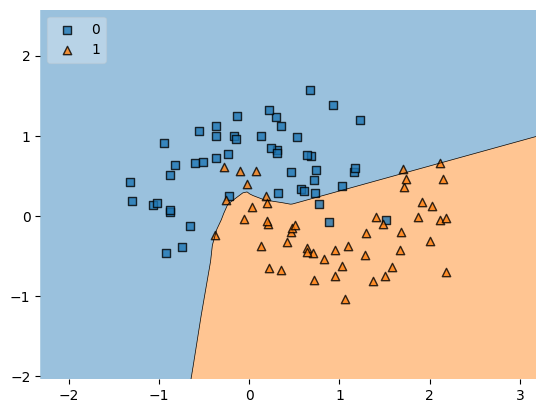

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [19]:
(np.random.randn(10,10)*0.01).min()

-0.02508494760629906

In [20]:
(np.random.randn(10,10)*0.01).max()

0.027500148269296337